<p>In session_5:

Solve breast_cancer problem with different svm kernels</p>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#fetch breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [7]:
# data description
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
# read the data
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

# add target column
df['target'] = cancer['target']

# check the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# check the shape of the data
df.shape

(569, 31)

In [4]:
# check the target column
df['target'].value_counts()


1    357
0    212
Name: target, dtype: int64

In [6]:
# data description
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
# check the null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [24]:
# check for duplicates
df.duplicated().sum()

0

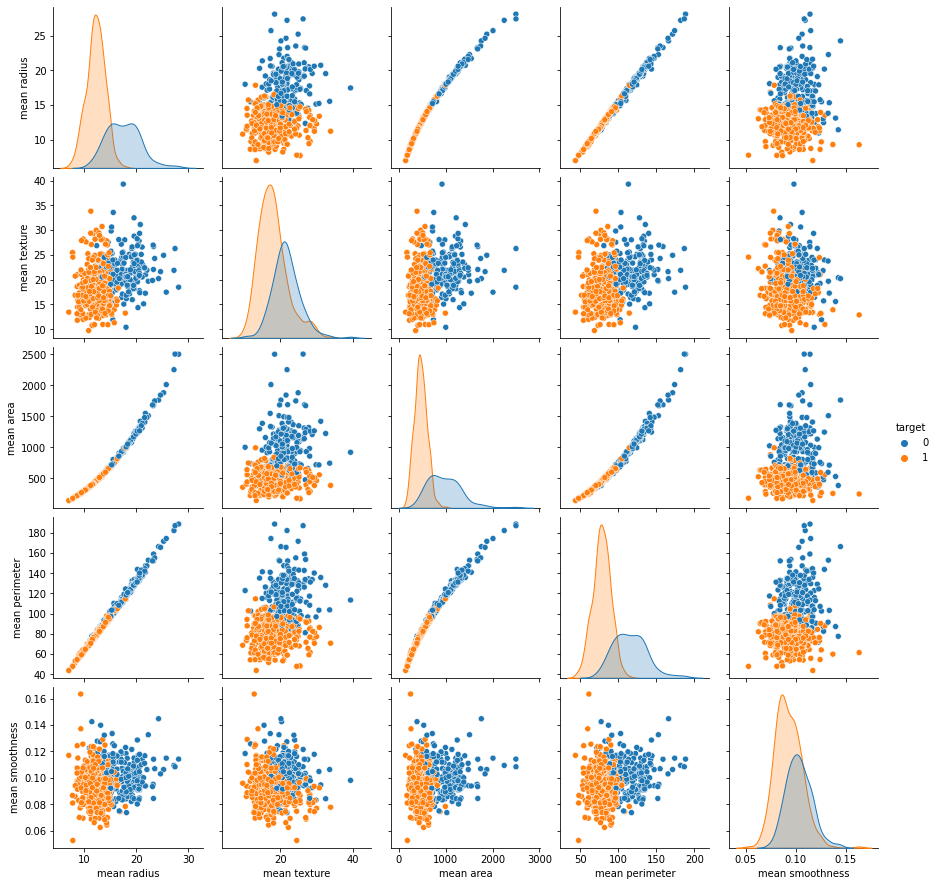

In [9]:
# visualize the data
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

c:\Users\CompuMisr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


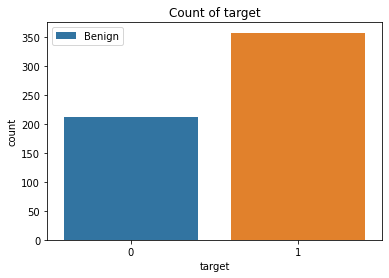

In [34]:
# visualize the target with percentage
sns.countplot(df['target'])
plt.title('Count of target')
plt.legend(['Benign', 'Malignant'])
plt.show()


<AxesSubplot:>

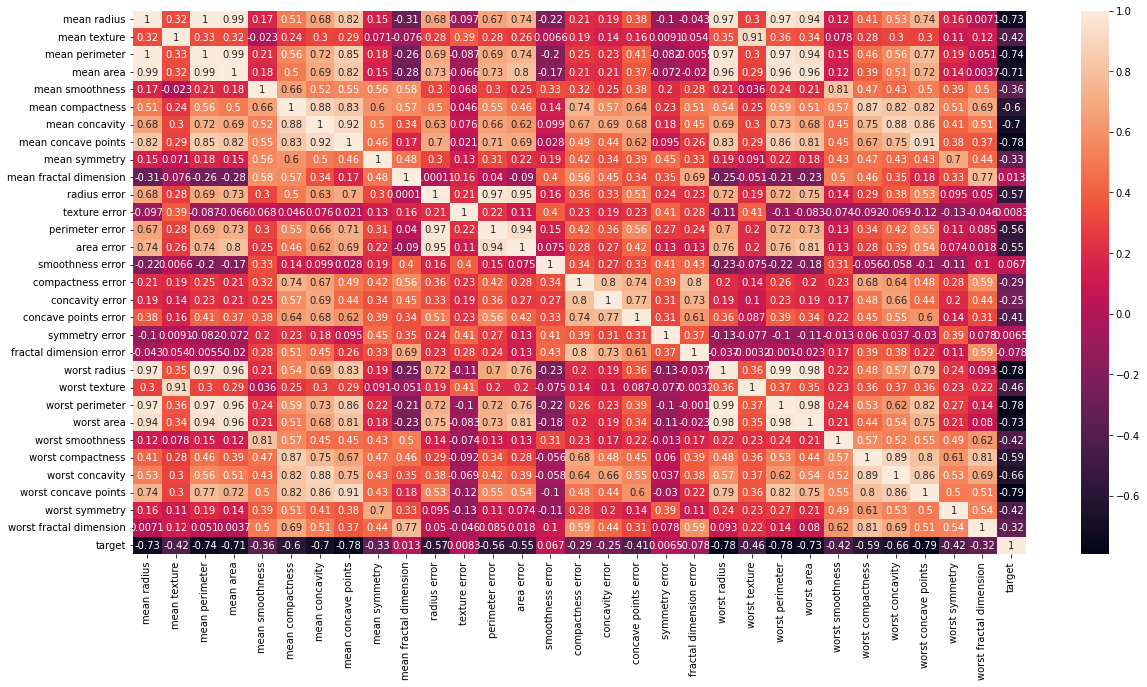

In [20]:
# visualize the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

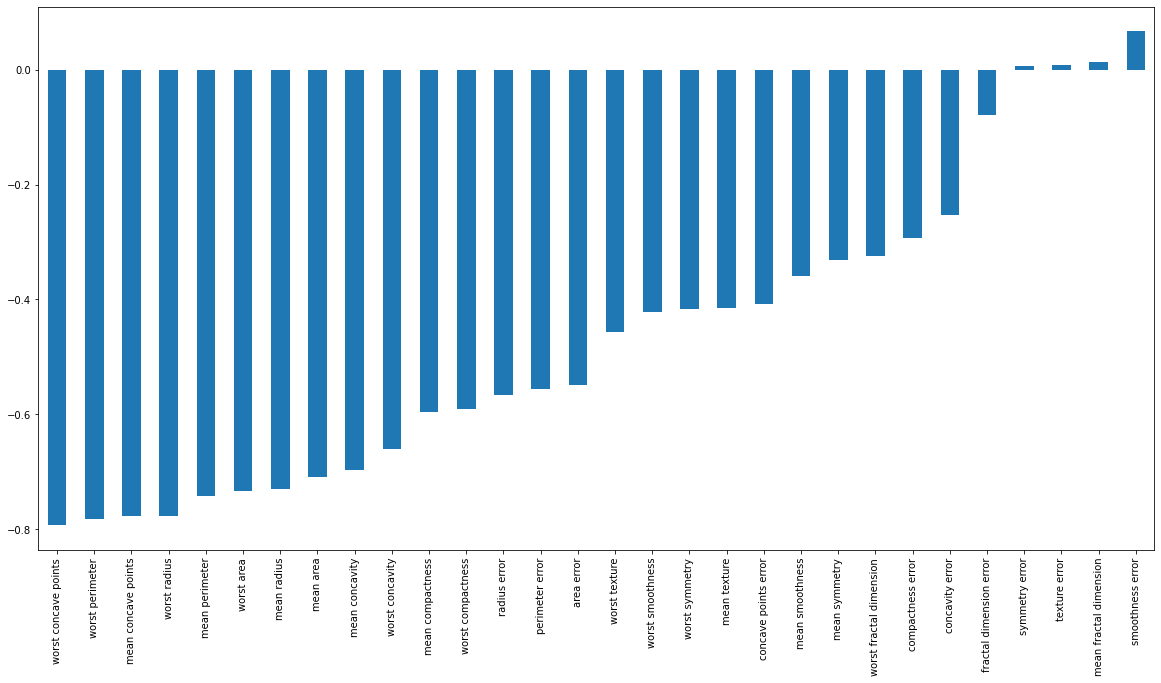

In [21]:
# visualize the correlation with target
plt.figure(figsize=(20, 10))
df.corr()['target'].sort_values().drop('target').plot(kind='bar')


In [22]:
# split the data
X = df.drop(['target'], axis=1)
y = df['target']

# print the shape of the data
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [25]:
# PCA
from sklearn.decomposition import PCA

# finding the best number of components
for i in range(1, 30):
    pca = PCA(n_components=i)
    pca.fit(X)
    print(f'Number of components: {i}')
    print(f'Explained variance: {pca.explained_variance_ratio_}')
    print(f'Explained variance sum: {sum(pca.explained_variance_ratio_)}')
    print('-----------------------------')

Number of components: 1
Explained variance: [0.98204467]
Explained variance sum: 0.9820446715106613
-----------------------------
Number of components: 2
Explained variance: [0.98204467 0.01617649]
Explained variance sum: 0.9982211613741724
-----------------------------
Number of components: 3
Explained variance: [0.98204467 0.01617649 0.00155751]
Explained variance sum: 0.9997786721191876
-----------------------------
Number of components: 4
Explained variance: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04]
Explained variance sum: 0.9998996040827277
-----------------------------
Number of components: 5
Explained variance: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]
Explained variance sum: 0.9999878765363124
-----------------------------
Number of components: 6
Explained variance: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06]
Explained variance sum: 0.9999945253758241
-----------------------

#### we won't use PCA because its medical data

In [26]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# print the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [28]:
# import svm
from sklearn.svm import SVC

# create the model
model = SVC()

# fit the model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

0.9736842105263158


<AxesSubplot:>

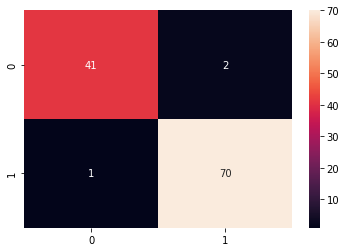

In [29]:
# check the accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))

# visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [30]:
# import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

